In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/PAN/data')

In [ ]:
file_dir = '/content/drive/MyDrive/Colab Notebooks/PAN/data'
file_list = os.listdir(file_dir)
# len(file_list)

In [ ]:
df_list = []
for filename in file_list:
    if filename.endswith('.jsonl'): # Adjust the file type as needed
        file_path = os.path.join(file_dir, filename)
        llm_name = filename[:-6]
        df = pd.read_json(file_path,lines=True)
        df['llm'] = llm_name
        df_list.append(df)

In [ ]:
final_df = pd.concat(df_list, ignore_index=True)
final_df['llm'].unique()
# df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/PAN/data/alpaca-7b.jsonl",lines=True)
# df['llm'] = 'alpaca'
# df.head()

array(['human', 'bigscience-bloomz-7b1', 'chavinlo-alpaca-13b',
       'alpaca-7b', 'gpt-3.5-turbo-0125',
       'meta-llama-llama-2-70b-chat-hf', 'gemini-pro',
       'gpt-4-turbo-preview', 'mistralai-mixtral-8x7b-instruct-v0.1',
       'mistralai-mistral-7b-instruct-v0.2',
       'meta-llama-llama-2-7b-chat-hf', 'qwen-qwen1.5-72b-chat-8bit',
       'text-bison-002', 'vicgalle-gpt2-open-instruct-v1'], dtype=object)

In [ ]:
# name = 'alpaca-7b.jsonl'
# print(name[:-6])

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/PAN/data/pandata.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PAN/data/pandata.csv')
# df.head()
len(df)

15218

In [ ]:
df['llm'] = df['llm'].astype(str)

In [ ]:
df['text'] = df['text'].str.replace('\n', '', regex=False)
df['text'] = df['text'].str.replace('\\', '', regex=False)

In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
print(df.dtypes)

id      object
text    object
llm     object
dtype: object


In [ ]:
import matplotlib.pyplot as plt

# Sample DataFrame
# Calculate text length
df['text_length'] = df['text'].apply(len)
grouped_df = df.groupby('llm')['text_length'].agg(['mean', 'max', 'min','std','count'])

# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Length by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

# Group by category and calculate mean text length
# grouped_data = df.groupby('llm')['text_Length'].mean()
# max_len_data = df.groupby('llm')['text_Length'].max()
# # Plotting
# # grouped_data.plot(kind='bar', color='skyblue')
# max_len_data.plot(kind='bar', color='green')
# plt.title('Average Text Length by LLM')
# plt.xlabel('llm')
# plt.ylabel('Average Text Length')
# # plt.xticks(rotation=45)
# # plt.tight_layout()
# # plt.subplots_adjust()
# plt.show()

In [79]:
df.head()

id  \
0  articles-cleaned-truncated/news-2021-01-01-202...   
1  articles-cleaned-truncated/news-2021-01-01-202...   
2  articles-cleaned-truncated/news-2021-01-01-202...   
3  articles-cleaned-truncated/news-2021-01-01-202...   
4  articles-cleaned-truncated/news-2021-01-01-202...   

                                                text    llm  text_length  \
0  Inaugural Address by President Joseph R. Biden...  human         3588   
1  Fact check: Biden inauguration impacted by pan...  human         2431   
2  Highlights from Joe Biden's 2021 inaugurationW...  human         3494   
3  Biden takes the helm, appeals for unity to tak...  human         3495   
4  'The Hill We Climb': Read Amanda Gorman's inau...  human         3860   

                                          clean_text  stop_word_length  \
0  Inaugural Address by President Joseph R  Biden...               332   
1  Fact check Biden inauguration impacted by pand...               159   
2  Highlights from Joe Bidens 2021 inaugurationWa...               218   
3  Biden takes the helm appeals for unity to take...               255   
4  The Hill We Climb Read Amanda Gormans inaugura...               273   

   oov_len  noun_len  proper_noun_len  past_len  intrg_len  verb_len  \
0       11       183               60        28          8       103   
1       33       137               46        19          6        67   
2       50       221              115        54          8        78   
3       27       190               59        49          6        98   
4      135       150               31        32         12       123   

   exclmtn_len  quote_len  hash_len  at_len  camel_count  word_count  
0            0          8         0       0          102         652  
1            0          4         0       0           50         393  
2            0          9         0       0          124         574  
3            0         12         0       0           75         589  
4            0         20         0       0           15         624

In [ ]:
# grouped_data = df.groupby('llm')['text_Length'].mean()
grouped_df

mean   max   min         std  \
llm                                                                         
alpaca-7b                              888.746090  3133     3  526.103089   
bigscience-bloomz-7b1                 1923.746090  3557    96  722.942449   
chavinlo-alpaca-13b                   1050.936523  5455     3  727.938249   
gemini-pro                            2871.578657  5833  1187  806.749135   
gpt-3.5-turbo-0125                    2644.281509  5935    75  592.416731   
gpt-4-turbo-preview                   3397.304508  6893  1187  793.999112   
human                                 2980.862006  7917    25  927.344400   
meta-llama-llama-2-70b-chat-hf        3121.488500  5917  1203  656.273861   
meta-llama-llama-2-7b-chat-hf         2714.731371  5825   365  643.660775   
mistralai-mistral-7b-instruct-v0.2    3388.298988  6234  1434  838.370931   
mistralai-mixtral-8x7b-instruct-v0.1  3399.667893  6866   805  797.491270   
qwen-qwen1.5-72b-chat-8bit            2694.974241  3897  1398  338.611659   
text-bison-002                        3339.365225  5557     3  809.841556   
vicgalle-gpt2-open-instruct-v1        2591.114995  3617    52  458.342613   

                                      count  
llm                                          
alpaca-7b                              1087  
bigscience-bloomz-7b1                  1087  
chavinlo-alpaca-13b                    1087  
gemini-pro                             1087  
gpt-3.5-turbo-0125                     1087  
gpt-4-turbo-preview                    1087  
human                                  1087  
meta-llama-llama-2-70b-chat-hf         1087  
meta-llama-llama-2-7b-chat-hf          1087  
mistralai-mistral-7b-instruct-v0.2     1087  
mistralai-mixtral-8x7b-instruct-v0.1   1087  
qwen-qwen1.5-72b-chat-8bit             1087  
text-bison-002                         1087  
vicgalle-gpt2-open-instruct-v1         1087

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
import re

In [ ]:
import re
import string
def remove_punctuation(text):
    text = re.sub(r'[\.]', ' ', text)
    text =  text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return text

# print(remove_punctuation('America\'s'))
df['clean_text'] = df['text'].apply(remove_punctuation)

In [81]:
def word_count(text):
  words = text.split()
  return len(words)

def ttr(text):
  words = text.split()
  return len(set(words))/len(words)

t = "I love mango slices from costco from Chicago"
print(ttr(t))
#

0.875


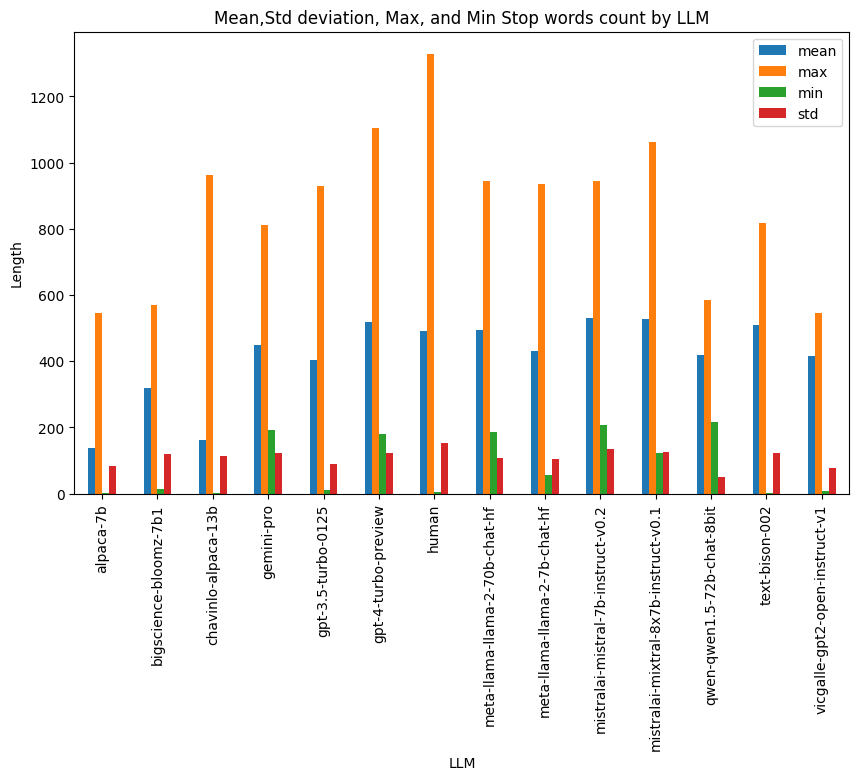

                                            mean   max  min         std
llm                                                                    
alpaca-7b                             136.609016   546    1   83.690503
bigscience-bloomz-7b1                 320.034959   571   15  119.642056
chavinlo-alpaca-13b                   161.736891   961    1  113.618642
gemini-pro                            448.328427   812  191  123.569270
gpt-3.5-turbo-0125                    402.227231   930   11   90.472155
gpt-4-turbo-preview                   517.267709  1104  179  123.074043
human                                 491.442502  1329    6  154.324382
meta-llama-llama-2-70b-chat-hf        495.104876   945  185  107.064696
meta-llama-llama-2-7b-chat-hf         429.220791   934   55  103.148479
mistralai-mistral-7b-instruct-v0.2    530.310948   943  206  135.579626
mistralai-mixtral-8x7b-instruct-v0.1  527.689052  1063  123  124.697110
qwen-qwen1.5-72b-chat-8bit            419.747010   585  215   51

In [78]:
df['word_count'] = df['clean_text'].apply(word_count)
grouped_df = df.groupby('llm')['word_count'].agg(['mean', 'max', 'min','std'])
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Stop words count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()
print(grouped_df)

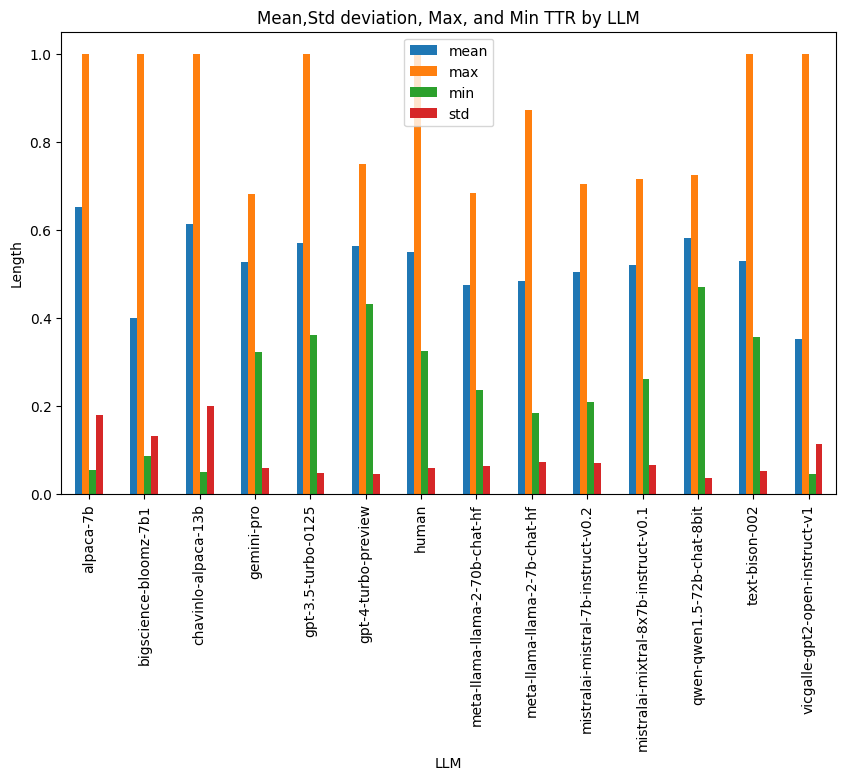

                                          mean       max       min       std
llm                                                                         
alpaca-7b                             0.652343  1.000000  0.053241  0.179752
bigscience-bloomz-7b1                 0.399269  1.000000  0.085417  0.129931
chavinlo-alpaca-13b                   0.612114  1.000000  0.049948  0.199336
gemini-pro                            0.525624  0.681818  0.321932  0.059141
gpt-3.5-turbo-0125                    0.569488  1.000000  0.359806  0.047339
gpt-4-turbo-preview                   0.563046  0.748603  0.431705  0.043642
human                                 0.549137  1.000000  0.323775  0.058540
meta-llama-llama-2-70b-chat-hf        0.473642  0.682927  0.234921  0.062248
meta-llama-llama-2-7b-chat-hf         0.483841  0.872727  0.183463  0.072886
mistralai-mistral-7b-instruct-v0.2    0.503065  0.703072  0.208009  0.070261
mistralai-mixtral-8x7b-instruct-v0.1  0.519991  0.715447  0.259643  0.064210

In [82]:
df['ttr'] = df['clean_text'].apply(ttr)
grouped_df = df.groupby('llm')['ttr'].agg(['mean', 'max', 'min','std'])
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min TTR by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()
print(grouped_df)

In [77]:
# df[df['word_count'] == 0]

Empty DataFrame
Columns: [id, text, llm, text_length, clean_text, stop_word_length, oov_len, noun_len, proper_noun_len, past_len, intrg_len, verb_len, exclmtn_len, quote_len, hash_len, at_len, camel_count, word_count]
Index: []

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_english = set(stopwords.words('english'))

def remove_stopwords(text, stopword_list):
    filtered_tokens = ' '.join(word.lower() for word in text.split() if word.lower() not in stopword_list)
    # print(filtered_tokens)
    return filtered_tokens

def stopwords_count(text, stopword_list):
  #  tokens = [token.strip() for token in text]
   stop_tokens = [token for token in text.split() if token.lower() in stopword_list]
  #  print(stop_tokens)
   return len(stop_tokens)

def out_of_vocab_count(text):
  filtered = remove_stopwords(text,stopwords_english)
  words = re.findall(r'\w+', filtered.lower())
  # print(words)
  # Find OOV words
  oov_words = [word for word in words if not list(swn.senti_synsets(word))]
  # print(oov_words)
  return len(oov_words)

text = df['clean_text'][0]
print(remove_stopwords(text,stopwords_english))
print(out_of_vocab_count(text))
print(stopwords_count(text,stopwords_english))

# filtered = remove_stopwords(text,stopwords_english)
# filtered
# tokens = [token.strip() for token in text]
# filtered = ' '.join(word.lower() for word in text.split() if word not in stopwords_english)
# filtered


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


inaugural address president joseph r biden jr chief justice roberts vice president harris speaker pelosi leader schumer leader mcconnell vice president pence distinguished guests fellow americans americas day democracys day day history hope renewal resolve crucible ages america tested anew america risen challenge today celebrate triumph candidate cause cause democracy people heard people heeded learned democracy precious democracy fragile hour friends democracy prevailed hallowed ground days ago violence sought shake capitols foundation come together one nation god indivisible carry peaceful transfer power two centuries look ahead uniquely american way restless bold optimistic set sights nation know must thank predecessors parties presence thank bottom heart know resilience constitution strength nation president carter spoke last night cannot us today salute lifetime service taken sacred oath patriots took oath first sworn george washington american story depends one us us us people se

In [ ]:
line = "violence.Disease"
line = re.sub(r'[\.]', ' ', line)
tst_str = 'american way – restless'
remove_punctuation(tst_str)

'american way   restless'

In [83]:
# df.columns
df['stop_word_length'] = df['clean_text'].apply(stopwords_count,stopword_list = stopwords_english)/df['word_count']



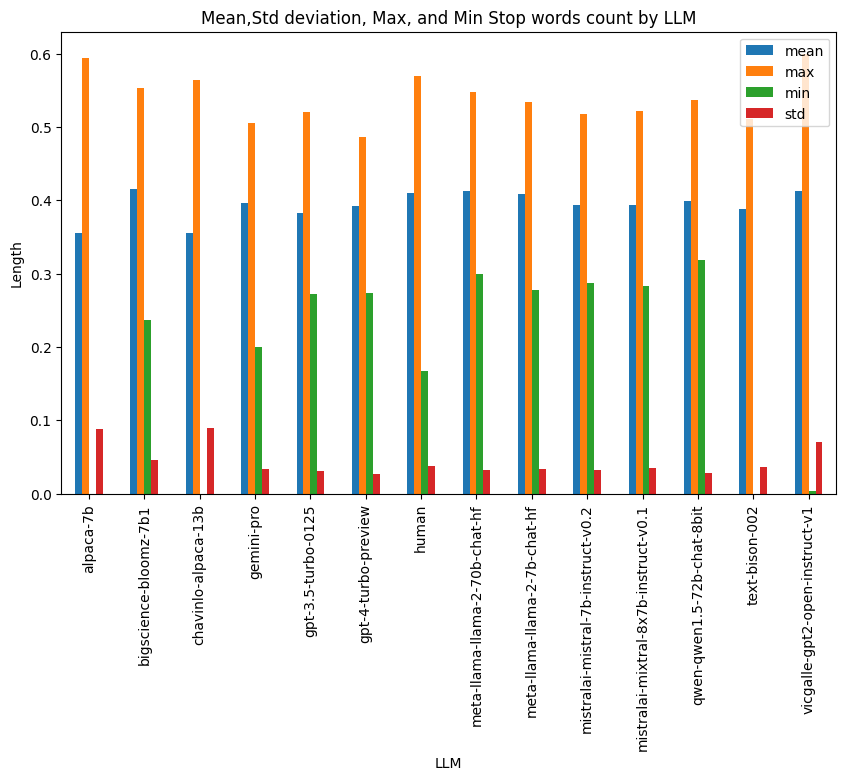

In [87]:
grouped_df = df.groupby('llm')['stop_word_length'].agg(['mean', 'max', 'min','std'])

# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Stop words count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

In [88]:
grouped_df

mean       max       min       std
llm                                                                         
alpaca-7b                             0.355235  0.593596  0.000000  0.087617
bigscience-bloomz-7b1                 0.415633  0.552846  0.236702  0.045288
chavinlo-alpaca-13b                   0.355929  0.564286  0.000000  0.089526
gemini-pro                            0.395610  0.505549  0.199620  0.033924
gpt-3.5-turbo-0125                    0.382127  0.520979  0.272727  0.030313
gpt-4-turbo-preview                   0.392642  0.486318  0.273743  0.026848
human                                 0.410302  0.569748  0.166667  0.038056
meta-llama-llama-2-70b-chat-hf        0.412045  0.548287  0.299652  0.032296
meta-llama-llama-2-7b-chat-hf         0.408799  0.533333  0.278037  0.033415
mistralai-mistral-7b-instruct-v0.2    0.394107  0.517192  0.286517  0.032567
mistralai-mixtral-8x7b-instruct-v0.1  0.392889  0.522167  0.283298  0.034925
qwen-qwen1.5-72b-chat-8bit            0.399096  0.536199  0.318713  0.028471
text-bison-002                        0.387551  0.510608  0.000000  0.036391
vicgalle-gpt2-open-instruct-v1        0.412240  0.600000  0.004032  0.070754

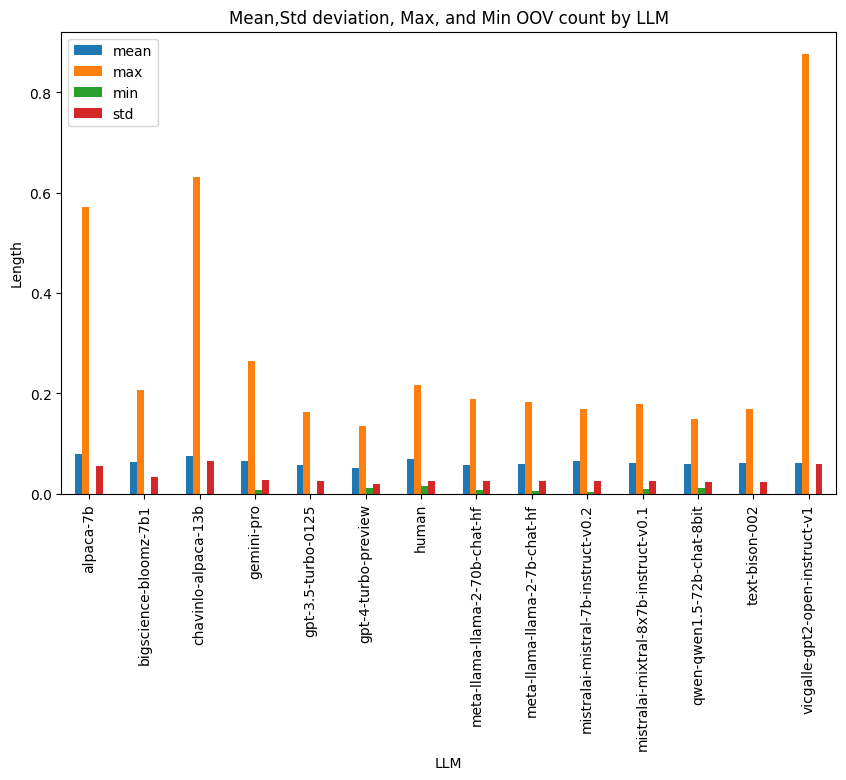

In [85]:
df['oov_len'] = df['clean_text'].apply(out_of_vocab_count)/df['word_count']
grouped_df = df.groupby('llm')['oov_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min OOV count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

In [86]:
grouped_df

mean       max       min       std
llm                                                                         
alpaca-7b                             0.078864  0.571429  0.000000  0.055179
bigscience-bloomz-7b1                 0.063004  0.207447  0.000000  0.033541
chavinlo-alpaca-13b                   0.075969  0.631579  0.000000  0.064502
gemini-pro                            0.065965  0.264259  0.007792  0.026799
gpt-3.5-turbo-0125                    0.056435  0.162242  0.000000  0.024522
gpt-4-turbo-preview                   0.050939  0.135542  0.010720  0.019974
human                                 0.068635  0.216346  0.015717  0.024582
meta-llama-llama-2-70b-chat-hf        0.056694  0.189583  0.006579  0.024169
meta-llama-llama-2-7b-chat-hf         0.059513  0.181818  0.005556  0.025051
mistralai-mistral-7b-instruct-v0.2    0.064957  0.167987  0.003413  0.025185
mistralai-mixtral-8x7b-instruct-v0.1  0.060333  0.178674  0.009032  0.024230
qwen-qwen1.5-72b-chat-8bit            0.058417  0.148867  0.011009  0.022231
text-bison-002                        0.061108  0.167920  0.000000  0.023238
vicgalle-gpt2-open-instruct-v1        0.061131  0.877551  0.000000  0.059337

In [ ]:
# str = df['text'][0]
# str = str.replace('\n\n','')
# string_without_escaped_slashes = str.encode('unicode_escape').decode('utf-8')
# string_without_escaped_slashes = string_without_escaped_slashes.replace("\\", "")
# str2 = str.replace('\\', '')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
import spacy
nlp = spacy.load('en_core_web_sm')

def find_pos_tags_spacy(sentence):
    doc = nlp(sentence)
    verbs = [token for token in doc if token.tag_ in ['VB','VBD', 'VBG', 'VBN', 'VBP','VBZ']]

    # Filter nouns, pronouns, and verbs
    proper_nouns = [token for token in doc if token.tag_ in [ 'NNP', 'NNPS']]
    nouns = [token for token in doc if token.tag_ in ['NNP', 'NNPS','NN', 'NNS' ]] # Nouns

    past_tense = [token for token in doc if token.tag_ in [ 'VBD', 'VBN']]
    intrg_words = [token for token in doc if token.tag_ in ['WRB', 'WDT', 'WP']]

    # print('Nouns',nouns)
    # print('Proper Nouns',proper_nouns)
    # print('Past Tense',past_tense)
    # print('Interrogative',intrg_words)
    # print('Verbs',verbs)
    return len(nouns),len(proper_nouns),len(past_tense),len(intrg_words),len(verbs)

# def find_pos_tags(sentence):
#     # Tokenize the sentence
#     words = nltk.word_tokenize(sentence)

#     # Get part of speech tags
#     pos_tags = nltk.pos_tag(words)

#     # Filter nouns, pronouns, and verbs
#     proper_nouns = [word for word, pos in pos_tags if pos in [ 'NNP', 'NNPS']]
#     nouns = [word for word, pos in pos_tags if pos in ['NNP', 'NNPS','NN', 'NNS' ]] # Nouns

#     past_tense = [word for word, pos in pos_tags if pos in [ 'VBD', 'VBN']]
#     intrg_words = [word for word, pos in pos_tags if pos in ['WRB', 'WDT', 'WP']]
#     verbs = [word for word, pos in pos_tags if pos in['VB','VBD', 'VBG', 'VBN', 'VBP','VBZ']]
#     print('Nouns',nouns)
#     print('Proper Nouns',proper_nouns)
#     print('Past Tense',past_tense)
#     print('Interrogative',intrg_words)
#     print('Verbs',verbs)
#     return len(nouns),len(proper_nouns),len(past_tense),len(intrg_words),len(verbs)


t = 'john and mary are reading a book which was published in 1975 and was bought by mary'#df['clean_text'][0]
find_pos_tags_spacy(t)



[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


(4, 3, 4, 1, 6)

In [89]:
#len(nouns),len(proper_nouns),len(past_tense),len(intrg_words),len(verbs)

df[['noun_len', 'proper_noun_len','past_len','intrg_len','verb_len']] = df['clean_text'].apply(find_pos_tags_spacy).tolist()

ValueError: operands could not be broadcast together with shapes (15218,5) (15218,) 

In [90]:
df.head()

id  \
0  articles-cleaned-truncated/news-2021-01-01-202...   
1  articles-cleaned-truncated/news-2021-01-01-202...   
2  articles-cleaned-truncated/news-2021-01-01-202...   
3  articles-cleaned-truncated/news-2021-01-01-202...   
4  articles-cleaned-truncated/news-2021-01-01-202...   

                                                text    llm  text_length  \
0  Inaugural Address by President Joseph R. Biden...  human         3588   
1  Fact check: Biden inauguration impacted by pan...  human         2431   
2  Highlights from Joe Biden's 2021 inaugurationW...  human         3494   
3  Biden takes the helm, appeals for unity to tak...  human         3495   
4  'The Hill We Climb': Read Amanda Gorman's inau...  human         3860   

                                          clean_text  stop_word_length  \
0  Inaugural Address by President Joseph R  Biden...          0.509202   
1  Fact check Biden inauguration impacted by pand...          0.404580   
2  Highlights from Joe Bidens 2021 inaugurationWa...          0.379791   
3  Biden takes the helm appeals for unity to take...          0.432937   
4  The Hill We Climb Read Amanda Gormans inaugura...          0.437500   

    oov_len  noun_len  proper_noun_len  past_len  intrg_len  verb_len  \
0  0.016871       183               60        28          8       103   
1  0.083969       137               46        19          6        67   
2  0.087108       221              115        54          8        78   
3  0.045840       190               59        49          6        98   
4  0.216346       150               31        32         12       123   

   exclmtn_len  quote_len  hash_len  at_len  camel_count  word_count       ttr  
0            0          8         0       0          102         652  0.512270  
1            0          4         0       0           50         393  0.564885  
2            0          9         0       0          124         574  0.515679  
3            0         12         0       0           75         589  0.550085  
4            0         20         0       0           15         624  0.600962

In [91]:
df['noun_len'] = df['noun_len'] / df['word_count']
df['proper_noun_len'] = df['proper_noun_len'] / df['word_count']
df['past_len'] = df['past_len'] / df['word_count']
df['intrg_len'] = df['intrg_len'] / df['word_count']
df['verb_len'] = df['verb_len'] / df['word_count']

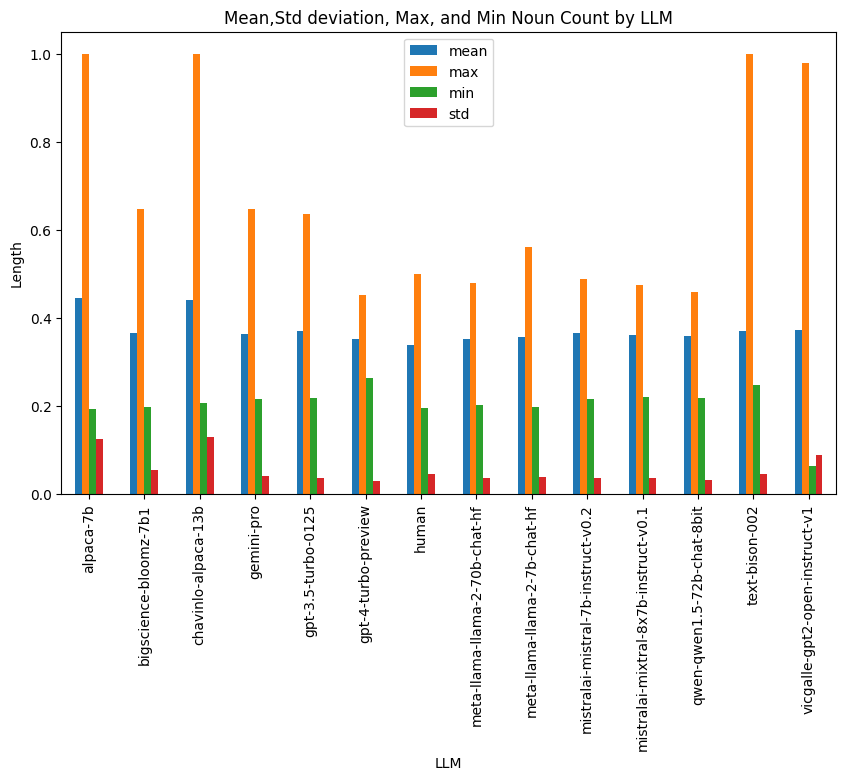

In [92]:
grouped_df = df.groupby('llm')['noun_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Noun Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

In [93]:
#noun_len	proper_noun_len	past_len	intrg_len	verb_len
grouped_df

mean       max       min       std
llm                                                                         
alpaca-7b                             0.444127  1.000000  0.192053  0.123489
bigscience-bloomz-7b1                 0.365708  0.646277  0.197211  0.052655
chavinlo-alpaca-13b                   0.440402  1.000000  0.206035  0.127732
gemini-pro                            0.362052  0.646388  0.214286  0.039576
gpt-3.5-turbo-0125                    0.369954  0.636364  0.217257  0.034807
gpt-4-turbo-preview                   0.351481  0.452261  0.263158  0.027500
human                                 0.338708  0.500000  0.195062  0.044343
meta-llama-llama-2-70b-chat-hf        0.350427  0.479224  0.200883  0.035396
meta-llama-llama-2-7b-chat-hf         0.355720  0.560000  0.197368  0.038353
mistralai-mistral-7b-instruct-v0.2    0.365745  0.488576  0.214900  0.036010
mistralai-mixtral-8x7b-instruct-v0.1  0.359724  0.473888  0.219739  0.035150
qwen-qwen1.5-72b-chat-8bit            0.358628  0.458034  0.217195  0.031643
text-bison-002                        0.369527  1.000000  0.246667  0.045148
vicgalle-gpt2-open-instruct-v1        0.372435  0.979592  0.061688  0.086959

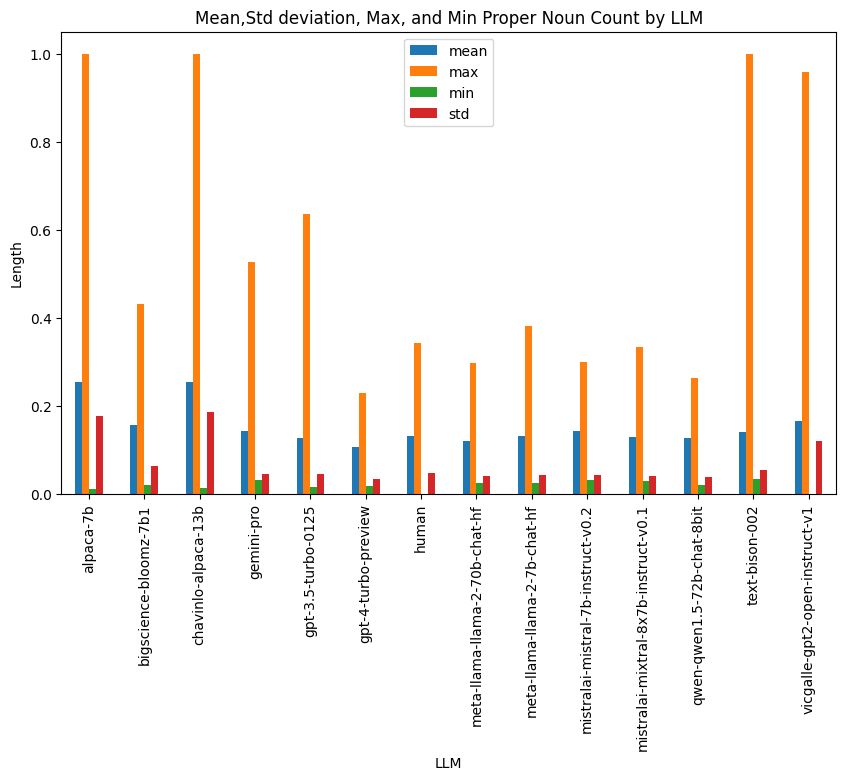

                                          mean       max       min       std
llm                                                                         
alpaca-7b                             0.254559  1.000000  0.010121  0.175879
bigscience-bloomz-7b1                 0.155889  0.430518  0.018957  0.062702
chavinlo-alpaca-13b                   0.253610  1.000000  0.013767  0.185843
gemini-pro                            0.141859  0.526616  0.029787  0.045115
gpt-3.5-turbo-0125                    0.127084  0.636364  0.014056  0.043491
gpt-4-turbo-preview                   0.105940  0.229462  0.016835  0.033608
human                                 0.130497  0.342508  0.000000  0.046672
meta-llama-llama-2-70b-chat-hf        0.119483  0.296651  0.023256  0.039525
meta-llama-llama-2-7b-chat-hf         0.130627  0.381818  0.022959  0.041912
mistralai-mistral-7b-instruct-v0.2    0.143335  0.299383  0.030347  0.042297
mistralai-mixtral-8x7b-instruct-v0.1  0.128827  0.332143  0.028120  0.040607

In [94]:
grouped_df = df.groupby('llm')['proper_noun_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Proper Noun Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

print(grouped_df)

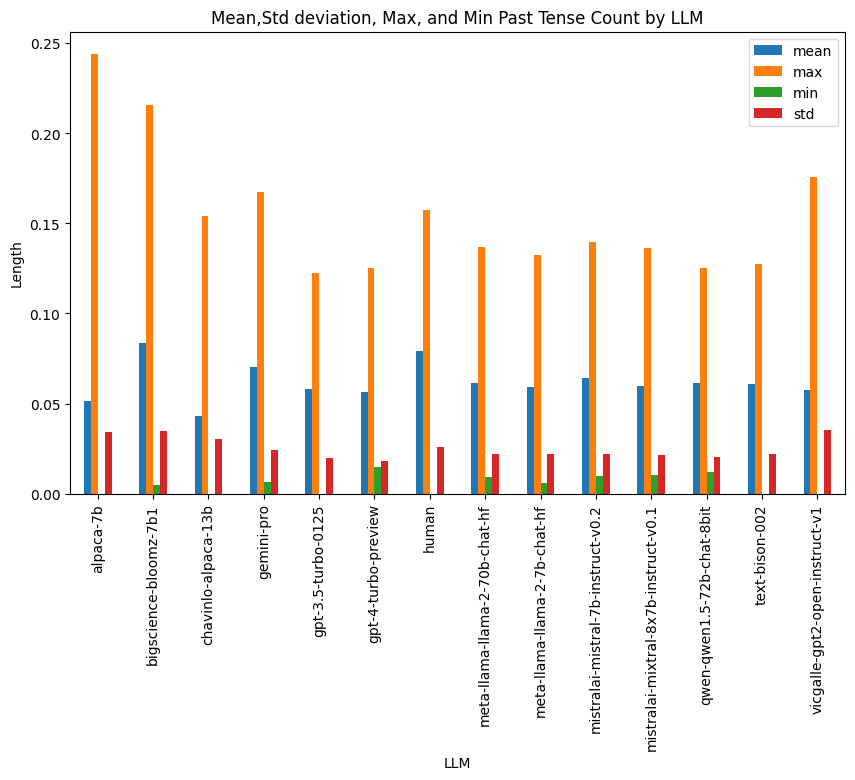

                                          mean       max       min       std
llm                                                                         
alpaca-7b                             0.051665  0.244253  0.000000  0.034324
bigscience-bloomz-7b1                 0.083503  0.215645  0.004854  0.034676
chavinlo-alpaca-13b                   0.043195  0.153846  0.000000  0.030403
gemini-pro                            0.070546  0.167235  0.006678  0.024445
gpt-3.5-turbo-0125                    0.057860  0.122402  0.000000  0.019748
gpt-4-turbo-preview                   0.056582  0.125506  0.014925  0.018257
human                                 0.079021  0.157197  0.000000  0.025961
meta-llama-llama-2-70b-chat-hf        0.061617  0.136792  0.009238  0.021816
meta-llama-llama-2-7b-chat-hf         0.059404  0.132468  0.006098  0.021858
mistralai-mistral-7b-instruct-v0.2    0.064172  0.139738  0.010020  0.021827
mistralai-mixtral-8x7b-instruct-v0.1  0.059987  0.136170  0.010471  0.021345

In [95]:
grouped_df = df.groupby('llm')['past_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Past Tense Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

print(grouped_df)

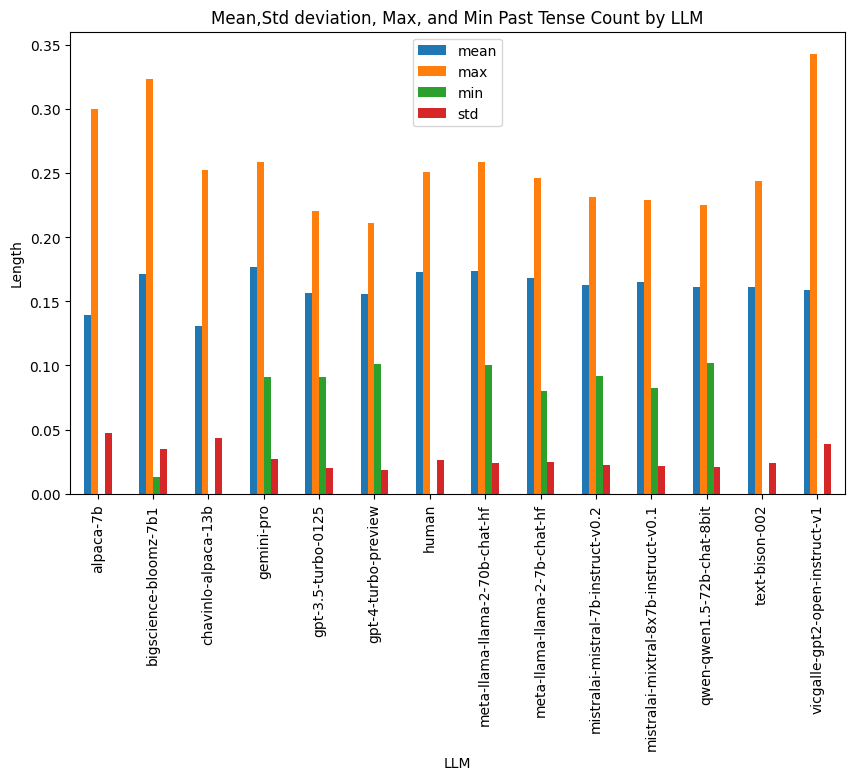

                                          mean       max       min       std
llm                                                                         
alpaca-7b                             0.138991  0.300000  0.000000  0.047433
bigscience-bloomz-7b1                 0.171101  0.323770  0.013298  0.034927
chavinlo-alpaca-13b                   0.131039  0.252747  0.000000  0.043414
gemini-pro                            0.177136  0.258475  0.091255  0.027256
gpt-3.5-turbo-0125                    0.156760  0.220588  0.090909  0.020306
gpt-4-turbo-preview                   0.155999  0.211009  0.101351  0.018410
human                                 0.173311  0.250681  0.000000  0.026213
meta-llama-llama-2-70b-chat-hf        0.173636  0.258621  0.100324  0.024154
meta-llama-llama-2-7b-chat-hf         0.167996  0.245989  0.080000  0.024546
mistralai-mistral-7b-instruct-v0.2    0.162869  0.231293  0.091603  0.022554
mistralai-mixtral-8x7b-instruct-v0.1  0.164954  0.228800  0.082067  0.021709

In [96]:
grouped_df = df.groupby('llm')['verb_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Past Tense Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

print(grouped_df)

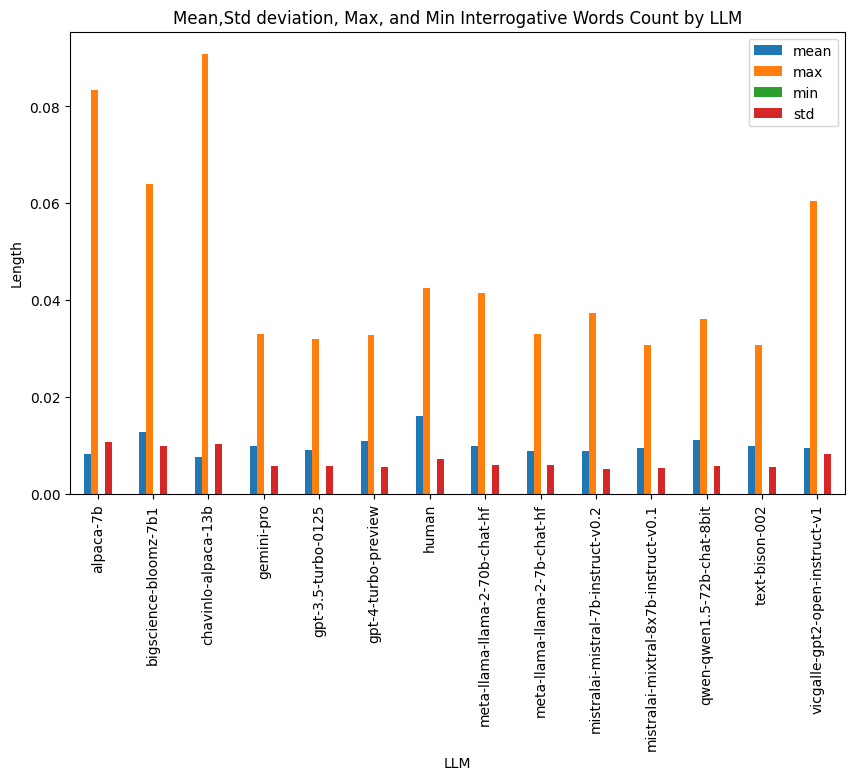

                                          mean       max  min       std
llm                                                                    
alpaca-7b                             0.008091  0.083333  0.0  0.010756
bigscience-bloomz-7b1                 0.012670  0.063877  0.0  0.009733
chavinlo-alpaca-13b                   0.007549  0.090909  0.0  0.010249
gemini-pro                            0.009763  0.033019  0.0  0.005644
gpt-3.5-turbo-0125                    0.009064  0.031983  0.0  0.005653
gpt-4-turbo-preview                   0.010870  0.032727  0.0  0.005440
human                                 0.016025  0.042484  0.0  0.007196
meta-llama-llama-2-70b-chat-hf        0.009827  0.041367  0.0  0.006004
meta-llama-llama-2-7b-chat-hf         0.008816  0.032967  0.0  0.005818
mistralai-mistral-7b-instruct-v0.2    0.008744  0.037415  0.0  0.005135
mistralai-mixtral-8x7b-instruct-v0.1  0.009447  0.030769  0.0  0.005374
qwen-qwen1.5-72b-chat-8bit            0.010988  0.036072  0.0  0

In [97]:
grouped_df = df.groupby('llm')['intrg_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Interrogative Words Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

print(grouped_df)

In [98]:
def count_chars(text,char_to_count):
  return text.count(char_to_count)

In [99]:
t = 'john and mary are reading a book which was published in 1975! and was bought by mary!'
count_chars(t,"!")

2

In [100]:
df['exclmtn_len'] = df['text'].apply(count_chars,char_to_count="!")/df['text_length']

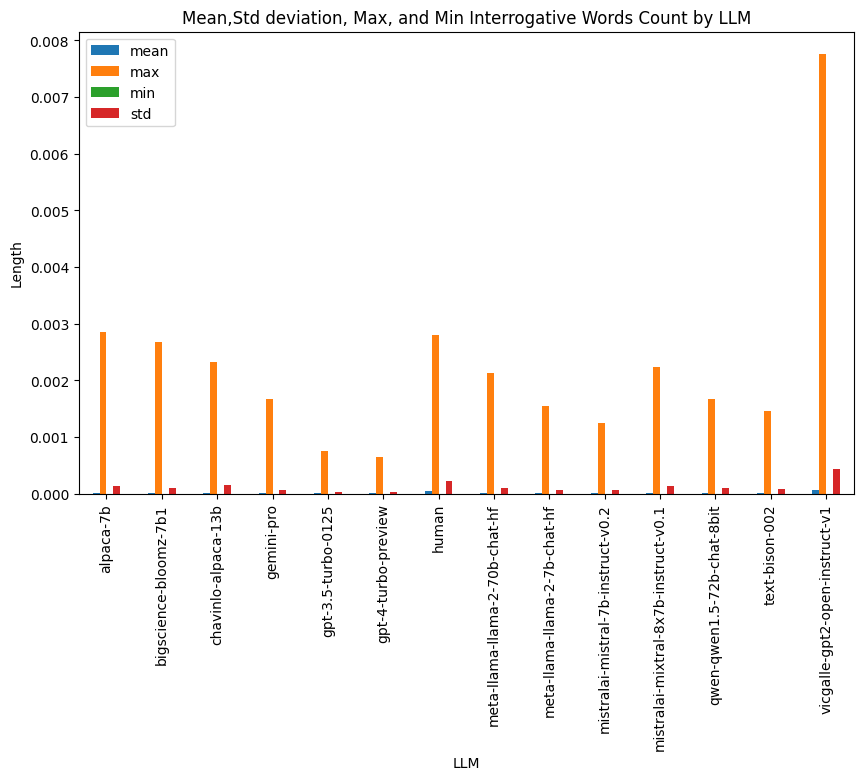

                                          mean       max  min       std
llm                                                                    
alpaca-7b                             0.000010  0.002849  0.0  0.000135
bigscience-bloomz-7b1                 0.000006  0.002673  0.0  0.000096
chavinlo-alpaca-13b                   0.000014  0.002315  0.0  0.000151
gemini-pro                            0.000006  0.001667  0.0  0.000065
gpt-3.5-turbo-0125                    0.000002  0.000746  0.0  0.000032
gpt-4-turbo-preview                   0.000003  0.000638  0.0  0.000033
human                                 0.000054  0.002806  0.0  0.000225
meta-llama-llama-2-70b-chat-hf        0.000009  0.002123  0.0  0.000100
meta-llama-llama-2-7b-chat-hf         0.000005  0.001547  0.0  0.000065
mistralai-mistral-7b-instruct-v0.2    0.000008  0.001248  0.0  0.000070
mistralai-mixtral-8x7b-instruct-v0.1  0.000016  0.002235  0.0  0.000141
qwen-qwen1.5-72b-chat-8bit            0.000011  0.001662  0.0  0

In [101]:
grouped_df = df.groupby('llm')['exclmtn_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Interrogative Words Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

print(grouped_df)

In [102]:
df['quote_len'] = df['text'].apply(count_chars,char_to_count="'")/df['text_length']
grouped_df = df.groupby('llm')['quote_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Interrogative Words Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()

print(grouped_df)

                                          mean       max  min       std
llm                                                                    
alpaca-7b                             0.003472  0.045977  0.0  0.003959
bigscience-bloomz-7b1                 0.003126  0.020142  0.0  0.002907
chavinlo-alpaca-13b                   0.003407  0.026303  0.0  0.003569
gemini-pro                            0.003244  0.014791  0.0  0.002364
gpt-3.5-turbo-0125                    0.002759  0.015514  0.0  0.002081
gpt-4-turbo-preview                   0.003054  0.009910  0.0  0.001681
human                                 0.003327  0.017241  0.0  0.002117
meta-llama-llama-2-70b-chat-hf        0.003579  0.013470  0.0  0.002376
meta-llama-llama-2-7b-chat-hf         0.003314  0.012840  0.0  0.002278
mistralai-mistral-7b-instruct-v0.2    0.003488  0.012390  0.0  0.002127
mistralai-mixtral-8x7b-instruct-v0.1  0.003072  0.010969  0.0  0.001937
qwen-qwen1.5-72b-chat-8bit            0.003286  0.012170  0.0  0

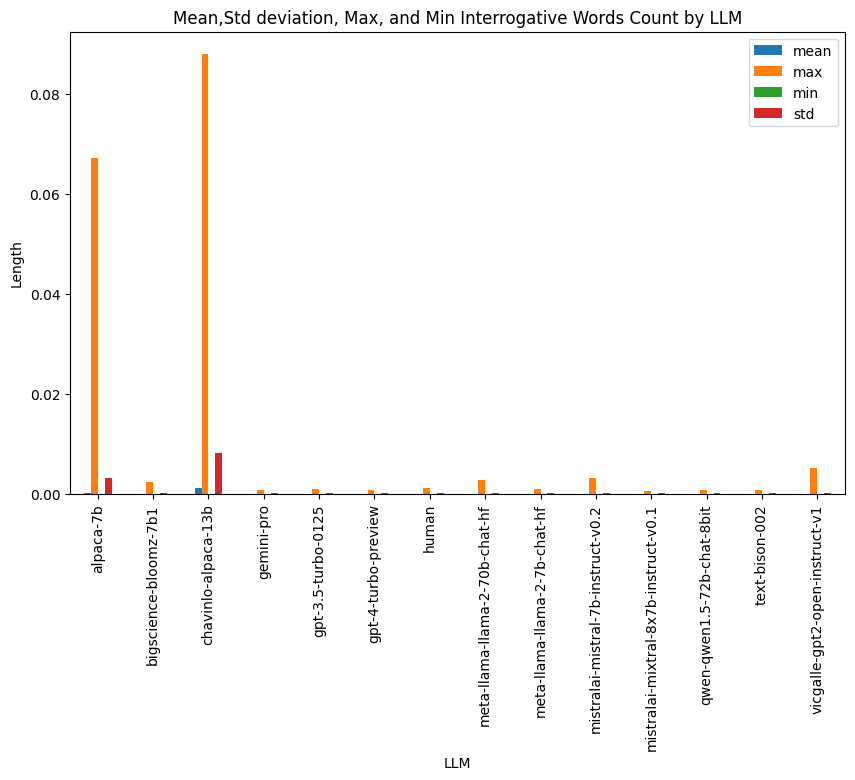

                                          mean       max  min       std
llm                                                                    
alpaca-7b                             0.000183  0.067262  0.0  0.003068
bigscience-bloomz-7b1                 0.000008  0.002315  0.0  0.000108
chavinlo-alpaca-13b                   0.001113  0.088115  0.0  0.008072
gemini-pro                            0.000003  0.000646  0.0  0.000037
gpt-3.5-turbo-0125                    0.000004  0.000953  0.0  0.000044
gpt-4-turbo-preview                   0.000003  0.000661  0.0  0.000034
human                                 0.000010  0.001190  0.0  0.000082
meta-llama-llama-2-70b-chat-hf        0.000007  0.002818  0.0  0.000098
meta-llama-llama-2-7b-chat-hf         0.000006  0.001015  0.0  0.000066
mistralai-mistral-7b-instruct-v0.2    0.000007  0.003048  0.0  0.000100
mistralai-mixtral-8x7b-instruct-v0.1  0.000005  0.000585  0.0  0.000043
qwen-qwen1.5-72b-chat-8bit            0.000005  0.000791  0.0  0

In [103]:
df['hash_len'] = df['text'].apply(count_chars,char_to_count="#")/df['text_length']
grouped_df = df.groupby('llm')['hash_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Interrogative Words Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()
print(grouped_df)

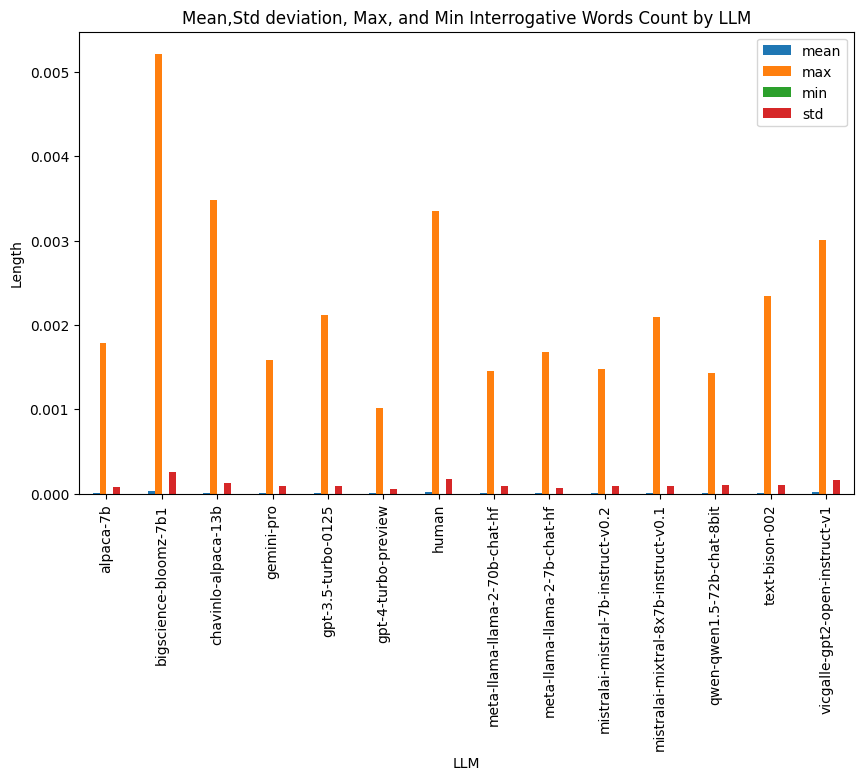

                                          mean       max  min       std
llm                                                                    
alpaca-7b                             0.000004  0.001789  0.0  0.000077
bigscience-bloomz-7b1                 0.000029  0.005217  0.0  0.000261
chavinlo-alpaca-13b                   0.000006  0.003484  0.0  0.000124
gemini-pro                            0.000009  0.001588  0.0  0.000092
gpt-3.5-turbo-0125                    0.000006  0.002122  0.0  0.000085
gpt-4-turbo-preview                   0.000006  0.001018  0.0  0.000059
human                                 0.000022  0.003351  0.0  0.000172
meta-llama-llama-2-70b-chat-hf        0.000011  0.001457  0.0  0.000090
meta-llama-llama-2-7b-chat-hf         0.000005  0.001683  0.0  0.000070
mistralai-mistral-7b-instruct-v0.2    0.000012  0.001472  0.0  0.000091
mistralai-mixtral-8x7b-instruct-v0.1  0.000009  0.002093  0.0  0.000094
qwen-qwen1.5-72b-chat-8bit            0.000012  0.001435  0.0  0

In [104]:
df['at_len'] = df['text'].apply(count_chars,char_to_count="@")/df['text_length']
grouped_df = df.groupby('llm')['at_len'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Interrogative Words Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()
print(grouped_df)

In [105]:
def count_charlist(text,charlist):
  count = (lambda x: [count_chars(text,i) for i in x])(charlist)
  return sum(count)


In [108]:
# No of punctuations
def count_punctuation(text):
  cleaned_sentence = re.sub(r'[^a-zA-Z0-9\'. ]', '', text)
  print(cleaned_sentence)
  return len(text) - len(cleaned_sentence)

text = "Let me ! coun't the number of punctuation#$.."
print(len(text))
# print(len(count_punctuation(text)))

45


In [109]:
def replace_non_alphanumeric(sentence):
    # Use regex to replace anything other than alphabets, numbers, and period with an empty string
    cleaned_sentence = re.sub(r'[^a-zA-Z0-9.]', '', sentence)
    return cleaned_sentence

sentence = "Hello! How are you doing today? Let's test: 123, 456#.789"
cleaned_sentence = replace_non_alphanumeric(sentence)
print(f"Cleaned sentence: {cleaned_sentence}")

Cleaned sentence: HelloHowareyoudoingtodayLetstest123456.789


In [110]:
#Camelcasing
def count_camelcasing(sentence):
    # Use regex to find words with a capital followed by one or more lowercase letters
    words = re.findall(r'\b[A-Z][a-z]+\b', sentence)
    return len(words)

sentence = "This is an Example Sentence with Proper Words."
word_count = count_camelcasing(sentence)
print(f"Number of words with the specified pattern: {word_count}")


Number of words with the specified pattern: 5


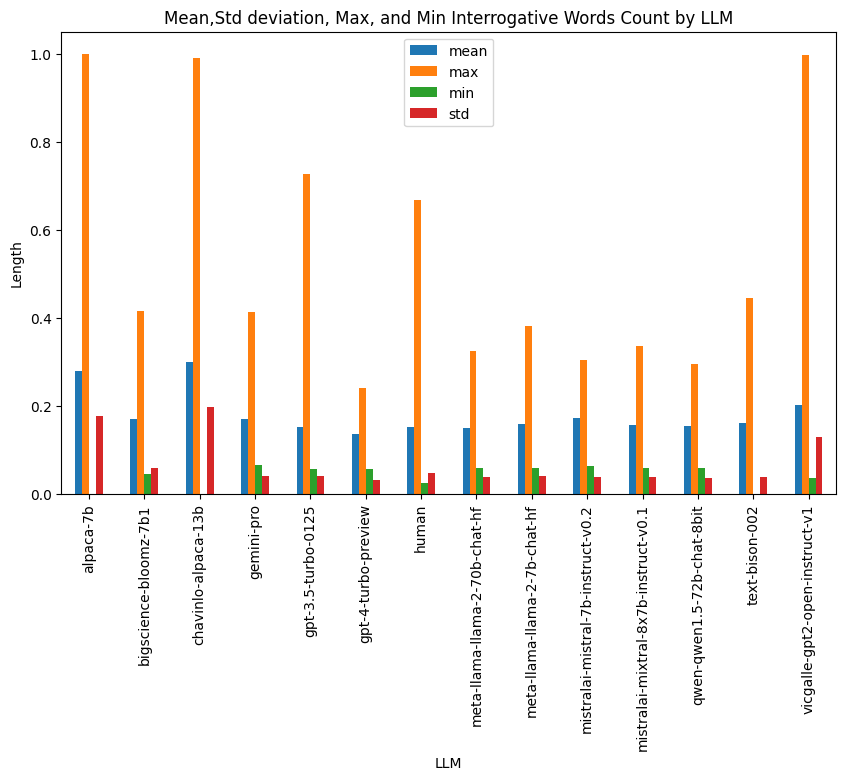

                                          mean       max       min       std
llm                                                                         
alpaca-7b                             0.278958  1.000000  0.000000  0.175239
bigscience-bloomz-7b1                 0.170077  0.415094  0.044643  0.057956
chavinlo-alpaca-13b                   0.299653  0.989362  0.000000  0.197595
gemini-pro                            0.169015  0.412548  0.065957  0.040063
gpt-3.5-turbo-0125                    0.150457  0.727273  0.056225  0.040915
gpt-4-turbo-preview                   0.135301  0.240793  0.056769  0.031421
human                                 0.152208  0.666667  0.024038  0.046359
meta-llama-llama-2-70b-chat-hf        0.149294  0.324841  0.058005  0.036622
meta-llama-llama-2-7b-chat-hf         0.157457  0.381818  0.058491  0.038910
mistralai-mistral-7b-instruct-v0.2    0.171972  0.302872  0.062139  0.038627
mistralai-mixtral-8x7b-instruct-v0.1  0.156045  0.335714  0.058468  0.038011

In [111]:
df['camel_count'] = df['clean_text'].apply(count_camelcasing)/df['word_count']
grouped_df = df.groupby('llm')['camel_count'].agg(['mean', 'max', 'min','std'])
# Plot
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean,Std deviation, Max, and Min Interrogative Words Count by LLM')
plt.xlabel('LLM')
plt.ylabel('Length')
plt.show()
print(grouped_df)

In [112]:
#Missspelling



In [ ]:
#Sentiment analysis